In [8]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data (1).csv to healthcare-dataset-stroke-data (1).csv


In [10]:
import pandas as pd
dataset = pd.read_csv("healthcare-dataset-stroke-data (1).csv")
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.894560,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset[['age', 'avg_glucose_level']], dataset[['bmi']], test_size=0.33, random_state=0)

In [12]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [13]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.8 MB/s eta 0:00:00
 

In [21]:
dataset = dataset.drop(['age','bmi'], axis=1)

In [23]:
dataset = dataset.drop(['avg_glucose_level','Residence_type','smoking_status','work_type'], axis=1)

In [24]:
dataset.shape

(5109, 5)

In [29]:
# Convert the DataFrame to a transactional format
transactions = []
for index, row in dataset.iterrows():
    transaction = set(row.dropna().values)
    transactions.append(transaction)


In [38]:
!pip install apyori




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5976 sha256=7b8d036c3e614c20c9930ba4f3ab7761ef7bbcbd2923cab1b1855148b950a2a4
  Stored in directory: /root/.cache/pip/wheels/32/2a/54/10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [39]:
from apyori import apriori

# Generate frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(transactions, min_support=0.05, min_confidence=0.7, min_lift=1.2, min_length=2)


In [42]:
print(dataset.dtypes)

gender           object
hypertension      int64
heart_disease     int64
ever_married     object
stroke            int64
dtype: object


In [45]:
dataset['gender'] = dataset['gender'].astype('category')


In [47]:
dataset['ever_married'] = dataset['ever_married'].astype('category')

In [51]:
non_numeric_values = pd.to_numeric(dataset['gender'], errors='coerce').isnull()
print(dataset[non_numeric_values]['gender'])


0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5104    Female
5105    Female
5106    Female
5107      Male
5108    Female
Name: gender, Length: 5109, dtype: category
Categories (2, object): ['Female', 'Male']


In [52]:
non_numeric_values = pd.to_numeric(dataset['ever_married'], errors='coerce').isnull()
print(dataset[non_numeric_values]['ever_married'])

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
5104    Yes
5105    Yes
5106    Yes
5107    Yes
5108    Yes
Name: ever_married, Length: 5109, dtype: category
Categories (2, object): ['No', 'Yes']


In [55]:
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
le = LabelEncoder()

# fit and transform the column 'my_col' to 0 and 1
dataset['gender_encoded'] = le.fit_transform(dataset['gender'])

# print the encoded values
print(dataset['gender_encoded'])


0       1
1       0
2       1
3       0
4       0
       ..
5104    0
5105    0
5106    0
5107    1
5108    0
Name: gender_encoded, Length: 5109, dtype: int64


In [56]:
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
le = LabelEncoder()

# fit and transform the column 'my_col' to 0 and 1
dataset['ever_married_encoded'] = le.fit_transform(dataset['ever_married'])

# print the encoded values
print(dataset['ever_married_encoded'])

0       1
1       1
2       1
3       1
4       1
       ..
5104    1
5105    1
5106    1
5107    1
5108    1
Name: ever_married_encoded, Length: 5109, dtype: int64


In [62]:
print(dataset.dtypes)

hypertension            int64
heart_disease           int64
stroke                  int64
gender_encoded          int64
ever_married_encoded    int64
dtype: object


In [60]:
dataset = dataset.drop(['gender','ever_married'], axis=1)

In [69]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# Find frequent itemsets with minimum support of 0.1
frequent_itemsets = apriori(dataset, min_support=0.1, use_colnames=True)

# Generate association rules with minimum confidence of 0.8
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

print(rules)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []


In [70]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display top 10 rules
print(rules.head(10))

              antecedents             consequents  antecedent support  \
0          (hypertension)         (heart_disease)            0.097475   
1         (heart_disease)          (hypertension)            0.054022   
2          (hypertension)                (stroke)            0.097475   
3                (stroke)          (hypertension)            0.048738   
4        (gender_encoded)          (hypertension)            0.413975   
5          (hypertension)        (gender_encoded)            0.097475   
6          (hypertension)  (ever_married_encoded)            0.097475   
7  (ever_married_encoded)          (hypertension)            0.664905   
8        (gender_encoded)         (heart_disease)            0.413975   
9         (heart_disease)        (gender_encoded)            0.054022   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.054022  0.012527    0.128514  2.378907  0.007261    1.085477  
1            0.097475  0.012527    0.231

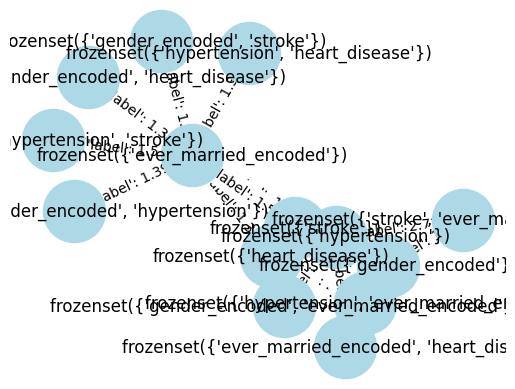

In [71]:
import matplotlib.pyplot as plt
import networkx as nx

# Plot the association rules as a graph
G = nx.DiGraph()
edges = [(rule['antecedents'], rule['consequents'], {'label': round(rule['lift'], 2)}) for _, rule in rules.iterrows()]
G.add_edges_from(edges)

pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
nx.draw_networkx_edge_labels(G, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()